<a href="https://colab.research.google.com/github/Ananassio/Data-Science_lab/blob/main/week_5/5_b_Regression_NY_Taxy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5 Exercise 2: Predicting the fare of taxi rides
Using the NY Taxi data set (see Use Case week I) and the use case from the lecture...

In [ ]:
import pandas as pd
import numpy as np
import folium


In [ ]:
#in colab, we need to clone the data from the repo
!git clone https://github.com/keuperj/DATA.git

Cloning into 'DATA'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 93 (delta 0), reused 5 (delta 0), pack-reused 87
Unpacking objects: 100% (93/93), done.
Checking out files: 100% (65/65), done.


In [ ]:
# we load the data we have saved after wrangling and pre-processing in block I
X=pd.read_csv('DATA/train_cleaned.csv')
drop_columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key','pickup_datetime','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3']
X=X.drop(drop_columns,axis=1)
X=pd.get_dummies(X)# one hot coding
#generate labels
y=X['fare_amount']
X=X.drop(['fare_amount'],axis=1)

In [ ]:
# a quick look at the data
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,...,0,0,1,0,0,0,0,0,1,0
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,...,1,0,0,0,0,0,1,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,...,1,0,0,0,0,0,1,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,...,1,0,0,0,0,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

In [ ]:
#show number of train samples
X.size

12400000

### Execise: Train a Random Forest Regression Model

#### E2.1 train model using [RF regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor) on ```DATA/train_cleaned.csv```
* optimize the model parameters (#trees, depth, vars per split, ...) and evaluate the [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) on train and test data ```DATA/test_cleaned.csv```
* **NOTE**: training on the full data set might take long... think of sub-sampling to a smaller train set during parameter optimization

#### E.2.2 Analyze the model error: are there typical settings where the model fails?
* use statistisc and visualizations of the errors (small and large)
* try to find schematic arrors like *long trips on weekends* have a high error ... 

#### E 2.3 go back to the feature extraction (see week 1) and add new features that could help in the error cases...

In [ ]:
# Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
#randomly split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
RFC = RandomForestRegressor( random_state=0)

In [ ]:
pred = RFC.predict(X_train)

In [ ]:
RFC.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(y_test, RFC.predict(X_test)))

4.300319650023676

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
res = (y_test-pred)

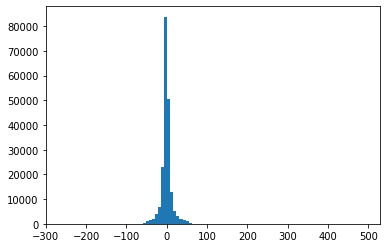

In [ ]:
plt.hist(res, bins=100);
plt.boxplot(res);

In [ ]:
np.mean(pred)

11.365306362500002

In [ ]:
np.mean(y_test)

11.347511400000002

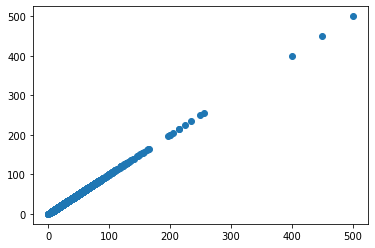

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test)